/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv
Columns in the dataset: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


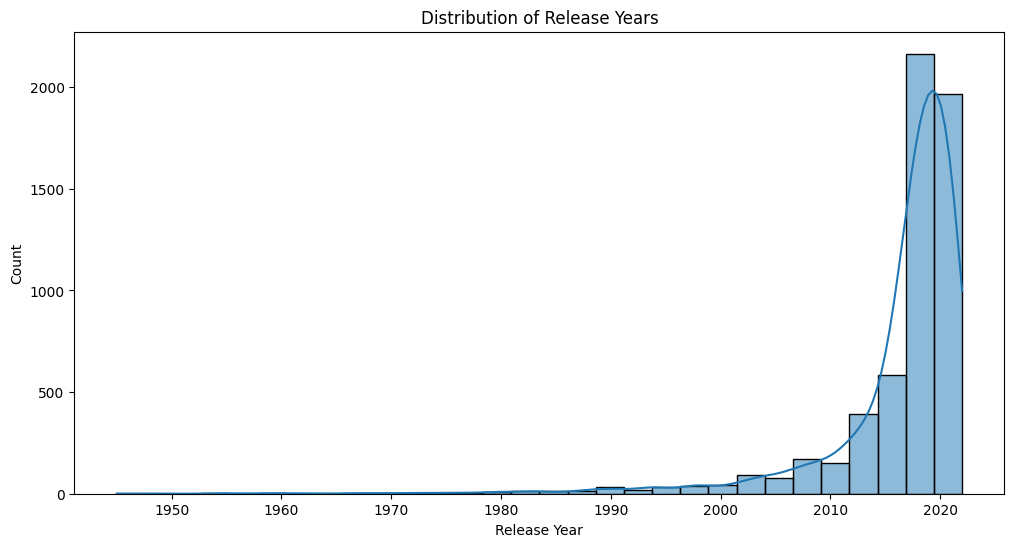

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


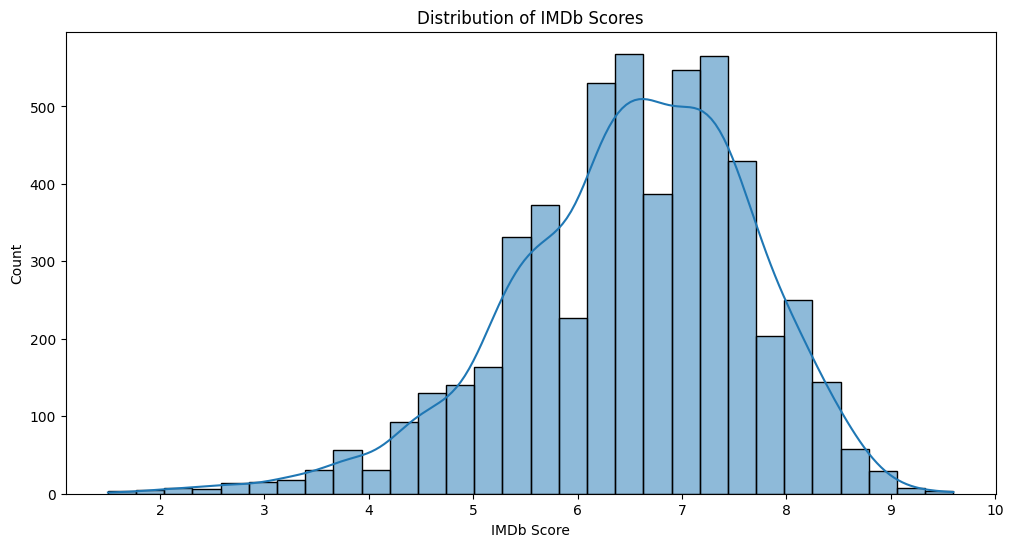

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


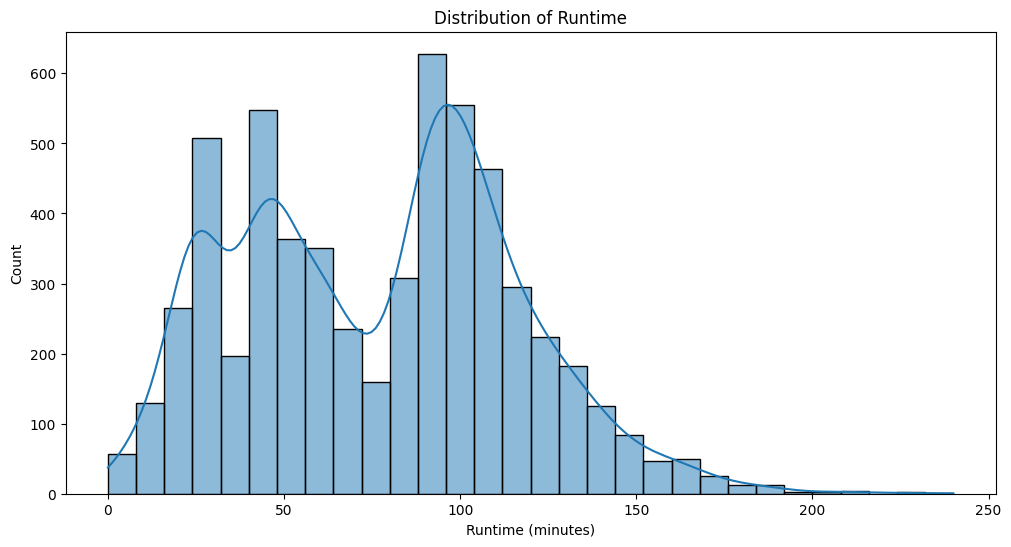

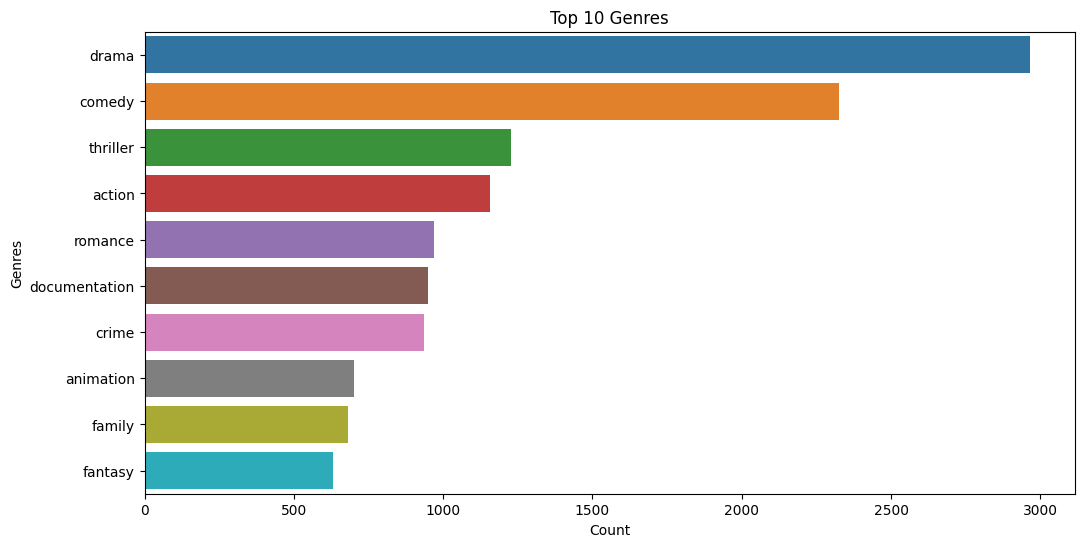

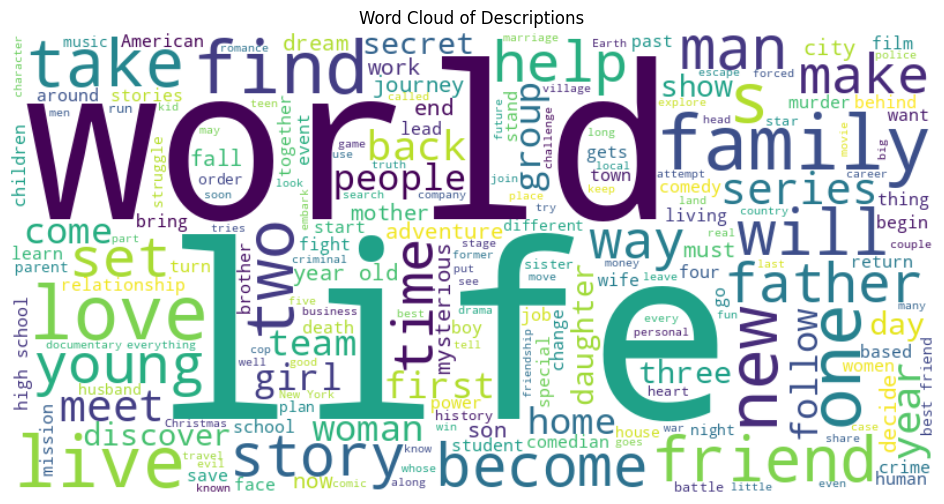

Recommendations for 'Stranger Things':
2246              Familiar Wife
3418            The Ghost Bride
403                Om Shanti Om
1769         Santa Clarita Diet
5392      Love Is Blind: Brazil
3171            The Wrong Missy
1855              The Discovery
5347         Mad for Each Other
2497    Derren Brown: Sacrifice
5300     A Boy Called Christmas
Name: title, dtype: object
Recommendations for 'The Witcher':
3289                                            Rocks
2113                                     Sandy Wexler
1366                                    World of Winx
2581                                  Weed the People
4338                                    The 3rd Eye 2
3726                                    The Grizzlies
1384                                         Lavender
4380                                              122
3852    A Life of Speed: The Juan Manuel Fangio Story
928                                Thanks for Sharing
Name: title, dtype: object
Recommendati

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

'''Problem Description
The goal of this project is to develop a content-based recommender system for Netflix TV shows and movies.
The genres and descriptions of the titles will be used to make recommendations.
The dataset includes information about titles such as name, genres, description, release year, and scores.
This project involves data loading, preprocessing, exploratory data analysis (EDA), model building, and evaluation.
The model building and training leverages TF-IDF vectorization and cosine similarity to recommend similar titles'''

'''Data Description
The dataset contains two files: titles.csv and credits.csv.
The focus for the recommender system is the titles.csv file, which includes the following columns:
id, title, show_type, description, release_year, age_certification, runtime, genres, production_countries, 
seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score.'''

#Load the dataset
data_path = '/kaggle/input/netflix-tv-shows-and-movies'

#List all files in the input directory to verify
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Read the titles.csv file
titles = pd.read_csv(os.path.join(data_path, 'titles.csv'))

#Inspect the columns in the dataset
print("Columns in the dataset:", titles.columns)

'''Exploratory Data Analysis (EDA) Procedure
In this section, the data is cleaned and visualized to understand the distribution of different features.
The different features include genres, release years, IMDb scores, and runtime.
Visualizations include bar plots, histograms, and box plots to identify patterns and outliers in the data.'''

#Data Cleaning
#Drop rows with missing values in 'genres' and 'description'
titles.dropna(subset=['genres', 'description'], inplace=True)

#Clean and preprocess 'genres' column
titles['genres'] = titles['genres'].apply(lambda x: ' '.join(x.strip('[]').replace("'", "").split(',')))

#Display the first few rows to verify the preprocessing
print(titles.head())

#Check for the presence of the 'show_type' column and adapt the EDA accordingly
if 'show_type' in titles.columns:
    # EDA: Visualizing the distribution of show types (TV shows and movies)
    plt.figure(figsize=(10, 5))
    sns.countplot(data=titles, x='show_type')
    plt.title('Distribution of TV Shows and Movies')
    plt.xlabel('Show Type')
    plt.ylabel('Count')
    plt.show()
else:
    print("'show_type' column is not present in the dataset. Skipping this visualization.")

#EDA: Visualizing the distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(titles['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

#EDA: Visualizing the distribution of IMDb scores
plt.figure(figsize=(12, 6))
sns.histplot(titles['imdb_score'], bins=30, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()

#EDA: Visualizing the distribution of runtime
plt.figure(figsize=(12, 6))
sns.histplot(titles['runtime'], bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

#EDA: Visualizing the top 10 genres
genres_split = titles['genres'].str.split(expand=True).stack().value_counts()
top_genres = genres_split.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

#EDA: Creating a word cloud for descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(titles['description']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

#Analysis
'''From the EDA, we observed the following:
The distribution of release years shows that most titles have been released in the last 20 years, with a peak in recent years.
IMDb scores are normally distributed with a slight positive skew.
Runtime varies widely, with most titles falling within 50 to 150 minutes.
The most common genres include Drama, Comedy, and Documentary.
The word cloud reveals that common terms in descriptions are related to the plot, characters, and themes of the titles.'''

#Strategy for Model Building and Training
'''We will use a content-based filtering approach leveraging TF-IDF vectorization for text data.
The model will compute cosine similarity between titles based on their genres and descriptions.
The recommendation function will find and return titles with the highest similarity to a given title.'''

#TF-IDF Vectorization
#Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

#Fit and transform the data using TF-IDF
tfidf_matrix = tfidf.fit_transform(titles['genres'] + ' ' + titles['description'])

#Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#Define the recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    #Get the index of the given title
    idx = titles[titles['title'] == title].index[0]
    
    #Calculate similarity scores for all titles
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the titles based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Get the indices of the top 10 most similar titles
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    #Return the top 10 most similar titles
    return titles['title'].iloc[movie_indices]

#Example usage of the recommendation function

#Direct usage of the function
recommended_titles = get_recommendations('Stranger Things')
print("Recommendations for 'Stranger Things':")
print(recommended_titles)

recommended_titles = get_recommendations('The Witcher')
print("Recommendations for 'The Witcher':")
print(recommended_titles)

#Usage within another function
def print_recommendations(title):
    recommendations = get_recommendations(title)
    print(f"Recommendations for '{title}':")
    print(recommendations)

print_recommendations('Black Mirror')
print_recommendations('Breaking Bad')

#Storing recommendations in a dictionary for later use
recommendations_dict = {}
titles_list = ['Narcos', 'Money Heist', 'House of Cards', 'The Crown']
for title in titles_list:
    recommendations_dict[title] = get_recommendations(title)

print("Stored Recommendations Dictionary:")
for title, recommendations in recommendations_dict.items():
    print(f"Recommendations for '{title}':\n{recommendations}\n")

#Function to save recommendations to a CSV file
def save_recommendations_to_csv(title, filename):
    recommendations = get_recommendations(title)
    recommendations.to_csv(filename, index=False)
    print(f"Recommendations for '{title}' saved to {filename}")

save_recommendations_to_csv('BoJack Horseman', 'bojack_recommendations.csv')
save_recommendations_to_csv('Dark', 'dark_recommendations.csv')

#Save the notebook with the results
output_path = '/kaggle/working/'
titles.to_csv(os.path.join(output_path, 'processed_titles.csv'), index=False)

'''Discussion/Conclusion
In this project, a model was built and trained to create a content-based recommender system for Netflix TV shows and movies.
The model used TF-IDF vectorization and cosine similarity to find similar titles based on their genres and descriptions.
The EDA provided insights into the distribution of various features in the dataset, helping us understand the data better.
The recommender system successfully generates recommendations, demonstrating the effectiveness of content-based filtering for this task.
Future work could involve integrating additional features such as user ratings or using more advanced NLP techniques for improved recommendations.'''
